In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
# Data Generation
torch.manual_seed(42)

N = 500
X = torch.randn(N, 1)
true_w = torch.tensor([[3.0]])
true_b = torch.tensor([2.0])
noise = 0.5 * torch.randn(N, 1)

y = X @ true_w + true_b + noise

In [5]:
# Model parameters
w = torch.randn(1, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
# Training loop
lr = 0.01
epochs = 200

losses = []
for epoch in range(epochs):
    # forward
    y_pred = X @ w + b
    loss = torch.mean((y_pred - y).pow(2))
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss}")
    # backward
    loss.backward()

    # update (SGD)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    losses.append(loss.item())

print("learned w:", w.item(), "b:", b.item())

epoch: 0, loss: 0.2329861968755722
epoch: 10, loss: 0.232986181974411
epoch: 20, loss: 0.2329861968755722
epoch: 30, loss: 0.23298616707324982
epoch: 40, loss: 0.232986181974411
epoch: 50, loss: 0.232986181974411
epoch: 60, loss: 0.232986181974411
epoch: 70, loss: 0.232986181974411
epoch: 80, loss: 0.232986181974411
epoch: 90, loss: 0.232986181974411
epoch: 100, loss: 0.232986181974411
epoch: 110, loss: 0.232986181974411
epoch: 120, loss: 0.232986181974411
epoch: 130, loss: 0.232986181974411
epoch: 140, loss: 0.232986181974411
epoch: 150, loss: 0.232986181974411
epoch: 160, loss: 0.232986181974411
epoch: 170, loss: 0.232986181974411
epoch: 180, loss: 0.232986181974411
epoch: 190, loss: 0.232986181974411
learned w: 3.032255172729492 b: 1.9902942180633545


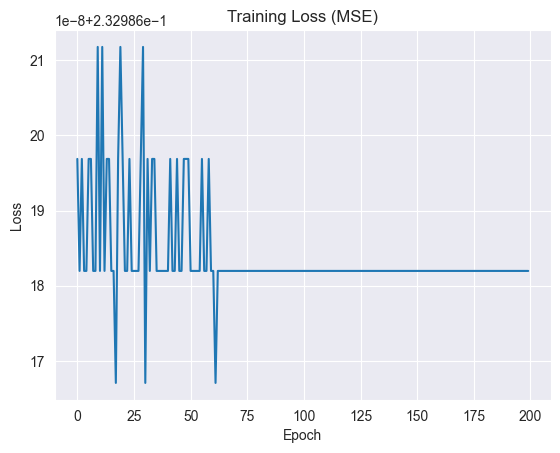

In [28]:
# Plot loss curve
plt.plot(range(len(losses)), losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()